In [1]:
from __future__ import print_function
from matplotlib import pyplot as plt
# get_ipython().magic(u'matplotlib auto')
import tensorflow as tf
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
# import torch
from tensorflow import keras
# config = tf.ConfigProto( device_count = {'GPU': 0 } )
# sess = tf.Session(config=config)
# keras.backend.set_session(sess)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Activation
from tensorflow import reshape
from keras.utils import np_utils
from tensorflow.keras.layers import Conv1D,Conv2D, MaxPooling1D,AveragePooling1D
from tensorflow.keras.layers import SeparableConv1D
from tensorflow.keras.layers import ZeroPadding2D,ZeroPadding1D, MaxPooling2D, Bidirectional
from tensorflow.keras.regularizers import l2,l1
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from scipy.io import loadmat
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import mean
from numpy import std
# import coremltools
# from torch import nn, optim
# import torch.nn.functional as F
import scipy.io
from scipy import stats
from IPython.display import display, HTML
from tensorflow.keras import optimizers
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU, SimpleRNN
from tensorflow.keras.layers import TimeDistributed
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
def historyVisualization(history):
    # Plot training & validation loss values
    plt.plot(history.history['mean_squared_error'])
    plt.plot(history.history['mean_absolute_error'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['MSE', 'MAE'], loc='upper left')
    plt.show()
def plotPredict(y_pred, y_test):
    plt.title('Predicted vs Actual')
    plt.xlabel('x')
    plt.ylabel('value')
    plt.plot(y_pred, label='Predicted')
    plt.plot(y_test, label='Actual ')
    plt.legend()
    plt.show()

In [3]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(20, 14))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [4]:
pip install mat73

Note: you may need to restart the kernel to use updated packages.


In [5]:
import mat73

In [6]:
mat1=mat73.loadmat('/media/naveen/nav/mat_codes/nina_DB2_codes/olsson_DB2/nina_DB2_prep_olsson.mat')
nina_raw_train=mat1['Training_process_data']
nina_raw_valid=mat1['Valid_raw_data']
print('raw_Train_data',nina_raw_train)

raw_Train_data [[2.35584597e-06 3.43724329e-06 4.42960521e-07 ... 8.55847324e-07
  4.20846412e-06 1.00000000e+00]
 [9.58987350e-07 4.44803494e-06 2.47400299e-07 ... 1.47556346e-06
  4.59774609e-06 1.00000000e+00]
 [5.23355765e-07 5.82732865e-06 1.03379749e-06 ... 2.15244640e-06
  4.97164613e-06 1.00000000e+00]
 ...
 [1.57123050e-05 8.05215110e-07 2.36345192e-07 ... 1.14578575e-06
  1.68446190e-07 4.90000000e+01]
 [1.32756881e-05 6.79637293e-07 1.43608415e-07 ... 3.45063211e-07
  1.13375193e-07 4.90000000e+01]
 [1.02464380e-05 6.16577209e-07 1.49370688e-07 ... 7.37652696e-07
  7.89642723e-08 4.90000000e+01]]


In [7]:
nina_raw_test=mat1['Testing_process_data'] 
# print('raw_valid_data',nina_raw_valid)
print('raw_Test_data',nina_raw_test)

In [8]:
np.savetxt("/media/naveen/nav/mat_codes/nina_DB2_codes/olsson_DB2/nina_pro_DB2_Train.csv", nina_raw_train, delimiter=",")
## np.savetxt("/content/drive/My Drive/codes/nina_prep_python/rawdata/nina_pro_Valid.csv", nina_raw_valid, delimiter=",")

In [9]:
np.savetxt("/media/naveen/nav/mat_codes/nina_DB2_codes/olsson_DB2/nina_pro_DB2_Test.csv", nina_raw_test, delimiter=",")

In [10]:
# file_path_Train= "/content/drive/My Drive/DB2/nina_pro_DB2_Train.csv"
# file_path_Test= "/content/drive/My Drive/DB2/nina_pro_DB2_Test.csv"
# file_path_Valid= "/content/drive/My Drive/codes/nina_prep_python/rawdata/nina_pro_Valid.csv"
# file_path_Train= "./nina_pro_Train_E123.csv"
# file_path_Test= "./nina_pro_Test_E123.csv"
# Set some standard parameters upfront
pd.options.display.float_format = '{:.1f}'.format
sns.set() # Default seaborn look and feel
plt.style.use('ggplot')
print('keras version ', keras.__version__)
# Same labels will be reused throughout the program
LABELS=[]
for i in range(1,49,1):
  LABELS.append (i)
print(LABELS)
# LABELS = ['1','2', '3', '4', '5', '6', '7', '8', '9', '10', '11','12','13',\
# '14','15','16','17','18','19','20','21','22','23','24','25','26','27','28',\
# '29','30','31','32','33','34','35','36','37','38','39','40','41','42','43',\
# '44','45','46','47','48','49','50','51','52']
#LABELS = np.asarray(LABELS)
#file_path= "./WISDM_ar_v1.1_raw.txt"

keras version  2.3.0-tf
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]


In [11]:
# The number of steps within one time segment
TIME_PERIODS = 200
# The steps to take from one segment to the next; if this value is equal to
# TIME_PERIODS, then there is no overlap between the segments
STEP_DISTANCE = 100
n_features = 12

In [12]:
def read_data_Train(file_path_Train):
    column_names = ['C1', 'C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','Class_label']
    df_Train = pd.read_csv(file_path_Train,
                     header=None,
                     names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Train['Class_label'].replace(regex=True,
      inplace=True,
      to_replace=r';',
      value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Train['Class_label'] = df_Train['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Train.dropna(axis=0, how='any', inplace=True)
    return df_Train
def convert_to_float(x):
    try:
        return np.float(x)
    except:
        return np.nan
def show_basic_dataframe_info(dataframe):
    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))

In [13]:
def read_data_Test(file_path_Test):
    column_names = ['C1', 'C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','Class_label']
    df_Test = pd.read_csv(file_path_Test,
                     header=None,
                     names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Test['Class_label'].replace(regex=True,
      inplace=True,
      to_replace=r';',
      value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Test['Class_label'] = df_Test['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Test.dropna(axis=0, how='any', inplace=True)
    return df_Test
def convert_to_float(x):
    try:
        return np.float(x)
    except:
        return np.nan
def show_basic_dataframe_info(dataframe):
    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))

In [14]:
df_Train = read_data_Train('/media/naveen/nav/mat_codes/nina_DB2_codes/olsson_DB2/nina_pro_DB2_Train.csv')
# Describe the data
show_basic_dataframe_info(df_Train)
df_Train.head(20)

Number of columns in the dataframe: 13
Number of rows in the dataframe: 78400000



,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


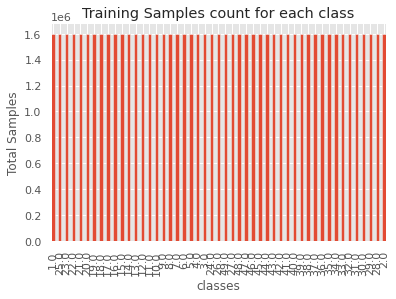

In [15]:
df_Train['Class_label'].value_counts().plot(kind='bar',
                                   title='Training Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

In [16]:
df_Test = read_data_Test('/media/naveen/nav/mat_codes/nina_DB2_codes/olsson_DB2/nina_pro_DB2_Test.csv')
# Describe the data
show_basic_dataframe_info(df_Test)
df_Test.head(20)

Number of columns in the dataframe: 13
Number of rows in the dataframe: 39200000



,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


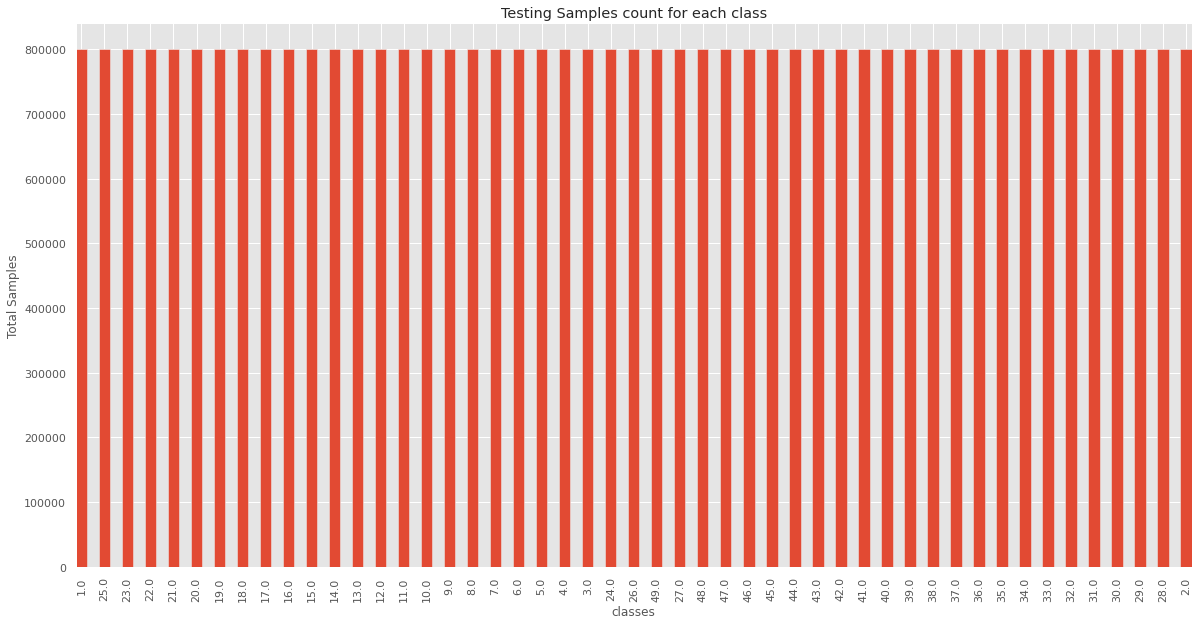

In [17]:
df_Test['Class_label'].value_counts().plot(kind='bar',
                                   title='Testing Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

In [18]:
pd.options.display.float_format = "{:,.5f}".format
df_Train.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label
0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
2,0.00000,0.00001,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001,0.00000,0.00000,0.00000,0.00000,1.00000
3,0.00000,0.00001,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001,0.00000,0.00000,0.00000,0.00000,1.00000
4,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000


In [19]:
scaler = preprocessing.StandardScaler().fit(df_Train.iloc[:,0:n_features])

In [20]:
df_Train.iloc[:,0:n_features]=scaler.transform(df_Train.iloc[:,0:n_features])

In [21]:
pd.options.display.float_format = "{:,.5f}".format
df_Train.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label
0,-0.25500,-0.16864,-0.39476,-0.28504,-0.18862,-0.14955,-0.21157,-0.50720,-0.33651,-0.22109,-0.28658,-0.10434,1.00000
1,-0.26982,-0.15172,-0.40135,-0.29270,-0.17131,-0.15502,-0.20988,-0.47399,-0.33178,-0.22261,-0.26067,-0.06487,1.00000
2,-0.27444,-0.12864,-0.37485,-0.30112,-0.15798,-0.16106,-0.20865,-0.39721,-0.32480,-0.22433,-0.23238,-0.02696,1.00000
3,-0.26360,-0.12951,-0.34057,-0.30066,-0.12218,-0.16566,-0.20870,-0.39231,-0.32500,-0.22563,-0.23481,-0.05101,1.00000
4,-0.25667,-0.14270,-0.31339,-0.29532,-0.09364,-0.16857,-0.20944,-0.42545,-0.32895,-0.22656,-0.25785,-0.10716,1.00000


In [22]:
pd.options.display.float_format = "{:,.5f}".format
df_Test.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label
0,0.00001,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001,0.00001,0.00000,0.00000,0.00000,0.00001,1.00000
1,0.00001,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001,0.00001,0.00000,0.00000,0.00000,0.00002,1.00000
2,0.00001,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001,0.00000,0.00000,0.00000,0.00002,1.00000
3,0.00001,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001,0.00000,0.00000,0.00000,0.00002,1.00000
4,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001,0.00000,0.00000,0.00000,0.00002,1.00000


In [23]:
df_Test.iloc[:,0:n_features]=scaler.transform(df_Test.iloc[:,0:n_features])

In [24]:
pd.options.display.float_format = "{:,.5f}".format
df_Test.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label
0,-0.17998,-0.19678,-0.30212,-0.30463,-0.39177,-0.15749,-0.17850,-0.25642,-0.27682,-0.23392,-0.30750,0.97057,1.00000
1,-0.18690,-0.19646,-0.29865,-0.31210,-0.33492,-0.16765,-0.18828,-0.27987,-0.27611,-0.22988,-0.30485,1.06901,1.00000
2,-0.20094,-0.19787,-0.29472,-0.32063,-0.26726,-0.16842,-0.19926,-0.31835,-0.27581,-0.22578,-0.29683,1.23364,1.00000
3,-0.22105,-0.20240,-0.29034,-0.31177,-0.23251,-0.15663,-0.20811,-0.35952,-0.27618,-0.22344,-0.27351,1.40254,1.00000
4,-0.24453,-0.20843,-0.28690,-0.30570,-0.21893,-0.13714,-0.21449,-0.40411,-0.27701,-0.22261,-0.25060,1.61349,1.00000


In [25]:
LABEL = 'ActivityEncoded'
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
df_Train[LABEL] = le.fit_transform(df_Train['Class_label'].values.ravel())
# df_Valid[LABEL] = le.fit_transform(df_Valid['Class_label'].values.ravel())
df_Test[LABEL] = le.fit_transform(df_Test['Class_label'].values.ravel())
print('df_train_size',df_Train)
# print('df_valid_size',df_Valid)
print('df_test_size',df_Test)

df_train_size                C1       C2       C3       C4       C5       C6       C7  \
0        -0.25500 -0.16864 -0.39476 -0.28504 -0.18862 -0.14955 -0.21157   
1        -0.26982 -0.15172 -0.40135 -0.29270 -0.17131 -0.15502 -0.20988   
2        -0.27444 -0.12864 -0.37485 -0.30112 -0.15798 -0.16106 -0.20865   
3        -0.26360 -0.12951 -0.34057 -0.30066 -0.12218 -0.16566 -0.20870   
4        -0.25667 -0.14270 -0.31339 -0.29532 -0.09364 -0.16857 -0.20944   
...           ...      ...      ...      ...      ...      ...      ...   
78399995 -0.18415 -0.20609 -0.38980 -0.17850 -0.47555 -0.16533 -0.15771   
78399996 -0.11943 -0.20971 -0.39634 -0.17317 -0.42963 -0.14938 -0.12064   
78399997 -0.11324 -0.21268 -0.40172 -0.18275 -0.39023 -0.15441 -0.09033   
78399998 -0.13910 -0.21479 -0.40485 -0.19777 -0.36512 -0.16905 -0.07054   
78399999 -0.17125 -0.21584 -0.40465 -0.21315 -0.35415 -0.16514 -0.06565   

               C8       C9      C10      C11      C12  Class_label  \
0        -0.507

In [26]:
def create_segments_and_labels(df, time_steps,step, label_name):
    # x, y, z acceleration as features
    # N_FEATURES = 10
    # Number of steps to advance in each iteration (for me, it should always
    # be equal to the time_steps in order to have no overlap between segments)
    # step = time_steps
	#step = 200
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
        c1s = df['C1'].values[i: i + time_steps]
        c2s = df['C2'].values[i: i + time_steps]
        c3s = df['C3'].values[i: i + time_steps]
        c4s = df['C4'].values[i: i + time_steps]
        c5s = df['C5'].values[i: i + time_steps]
        c6s = df['C6'].values[i: i + time_steps]
        c7s = df['C7'].values[i: i + time_steps]
        c8s = df['C8'].values[i: i + time_steps]
        c9s = df['C9'].values[i: i + time_steps]
        c10s = df['C10'].values[i: i + time_steps]
        c11s = df['C11'].values[i: i + time_steps]
        c12s = df['C12'].values[i: i + time_steps]
        # Retrieve the most often used label in this segment
      #  label_name - label_name.astype(int)
        label = stats.mode(df[label_name][i: i + time_steps])[0][0]
        segments.append([c1s, c2s, c3s,c4s, c5s, c6s,c7s, c8s, c9s,c10s,c11s,c12s])
        # segments = pd.concat([c1s, c2s, c3s,c4s, c5s, c6s,c7s, c8s, c9s, c10s], axis=1)
        labels.append(label)
    # Bring the segments into a better shape
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, n_features)
    labels = np.asarray(labels)
    return reshaped_segments, labels

In [27]:
x_train, y_train = create_segments_and_labels(df_Train,TIME_PERIODS,STEP_DISTANCE,LABEL)
print('x_train shape: ', x_train.shape)
# print(x_train)
print(x_train.shape[0], 'training samples')
print('y_train shape: ', y_train.shape)
# Set input & output dimensions
num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
print(num_time_periods)
print(num_sensors)
num_classes = le.classes_.size
print(list(le.classes_))
# input_shape = (num_time_periods,num_sensors)
# print(input_shape)
input_shape = (num_time_periods,num_sensors)
#x_train = x_train.reshape(x_train.shape[0], input_shape)
print('x_train shape:', x_train[0].shape)
print('input_shape:', input_shape)
x_train = x_train.astype('float32')
# x_train = [torch.tensor(arr, dtype=torch.float32) for arr in x_train]
# y_train = y_train.astype('float32')
# print(y_train)
y_train_hot = np_utils.to_categorical(y_train, num_classes)
print(y_train_hot)
# y_train_hot= [torch.tensor(arr, dtype=torch.uint8) for arr in y_train_hot]
print('New y_train shape: ', y_train_hot.shape)

x_train shape:  (7839, 10000, 12)
7839 training samples
y_train shape:  (7839,)
10000
12
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0]
x_train shape: (10000, 12)
input_shape: (10000, 12)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
New y_train shape:  (7839, 49)


In [28]:
x_test, y_test = create_segments_and_labels(df_Test,
                                            TIME_PERIODS,
                                            STEP_DISTANCE,
                                            LABEL)
print('x_test shape: ', x_test.shape)
# print(x_train)
print(x_test.shape[0], 'testing samples')
print('y_test shape: ', y_test.shape)
# Set input_shape / reshape for Keras
#x_test = x_test.reshape(x_test.shape[0], input_shape)
x_test = x_test.astype('float32')
y_test = y_test.astype('float32')
y_test_hot = np_utils.to_categorical(y_test, num_classes)

x_test shape:  (3919, 10000, 12)
3919 testing samples
y_test shape:  (3919,)


In [95]:
# n_steps, n_length = 20, 25
# n_steps, n_length= 10, 50
# n_steps, n_length= 16, 32
n_steps, n_length = 200, 12
n_depth=1
x_train = x_train.reshape(x_train.shape[0], n_steps, n_length,n_depth)
print('x_train shape: ', x_train.shape)
# x_valid = x_valid.reshape(x_valid.shape[0], n_steps, n_length, n_depth)
# print('x_valid shape: ', x_valid.shape)
x_test = x_test.reshape(x_test.shape[0], n_steps, n_length,n_depth)
print('x_test shape: ', x_test.shape)
n_outputs = y_train_hot.shape[1]
print('n_outputs',n_outputs)

x_train shape:  (7839, 200, 50, 12)
x_test shape:  (3919, 200, 50, 12)
n_outputs 49


In [96]:
verbose, epochs, batch_size = 0, 500, 512

In [97]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(9,1), padding='same', kernel_initializer="he_normal",strides=(3,1), \
                           input_shape=(n_steps,n_length,n_depth)))
model.add(MaxPooling2D(pool_size=(8,1),strides=(2,1)))
model.add(Activation('tanh'))
model.add(Conv2D(filters=64, kernel_size=(5,1),padding="same",kernel_initializer="he_normal",strides=(2,1)))
model.add(Activation('tanh'))
model.add(Dropout(0.2093))
model.add(Flatten())
model.add(Dense(512, activation='tanh'))
model.add(Dense(n_outputs, activation='softmax'))

In [98]:
adam=optimizers.Adam(lr=2.17e-3, beta_1=0.9, beta_2=0.999, amsgrad=False)
checkpoint_filepath = '/media/naveen/nav/mat_codes/nina_DB2_codes/olsson_DB2/CNN100X100/checkpoint.hdf5'
# model.load_weights(checkpoint_filepath) 
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath,verbose=1, monitor='val_accuracy',save_weights_only=True,save_best_only=True)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=50, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_89 (TimeDis (None, 200, 25, 64)       6976      
_________________________________________________________________
time_distributed_90 (TimeDis (None, 200, 25, 64)       256       
_________________________________________________________________
time_distributed_91 (TimeDis (None, 200, 9, 64)        0         
_________________________________________________________________
time_distributed_92 (TimeDis (None, 200, 9, 64)        0         
_________________________________________________________________
time_distributed_93 (TimeDis (None, 200, 5, 64)        20544     
_________________________________________________________________
time_distributed_94 (TimeDis (None, 200, 5, 64)        256       
_________________________________________________________________
time_distributed_95 (TimeDis (None, 200, 5, 64)       

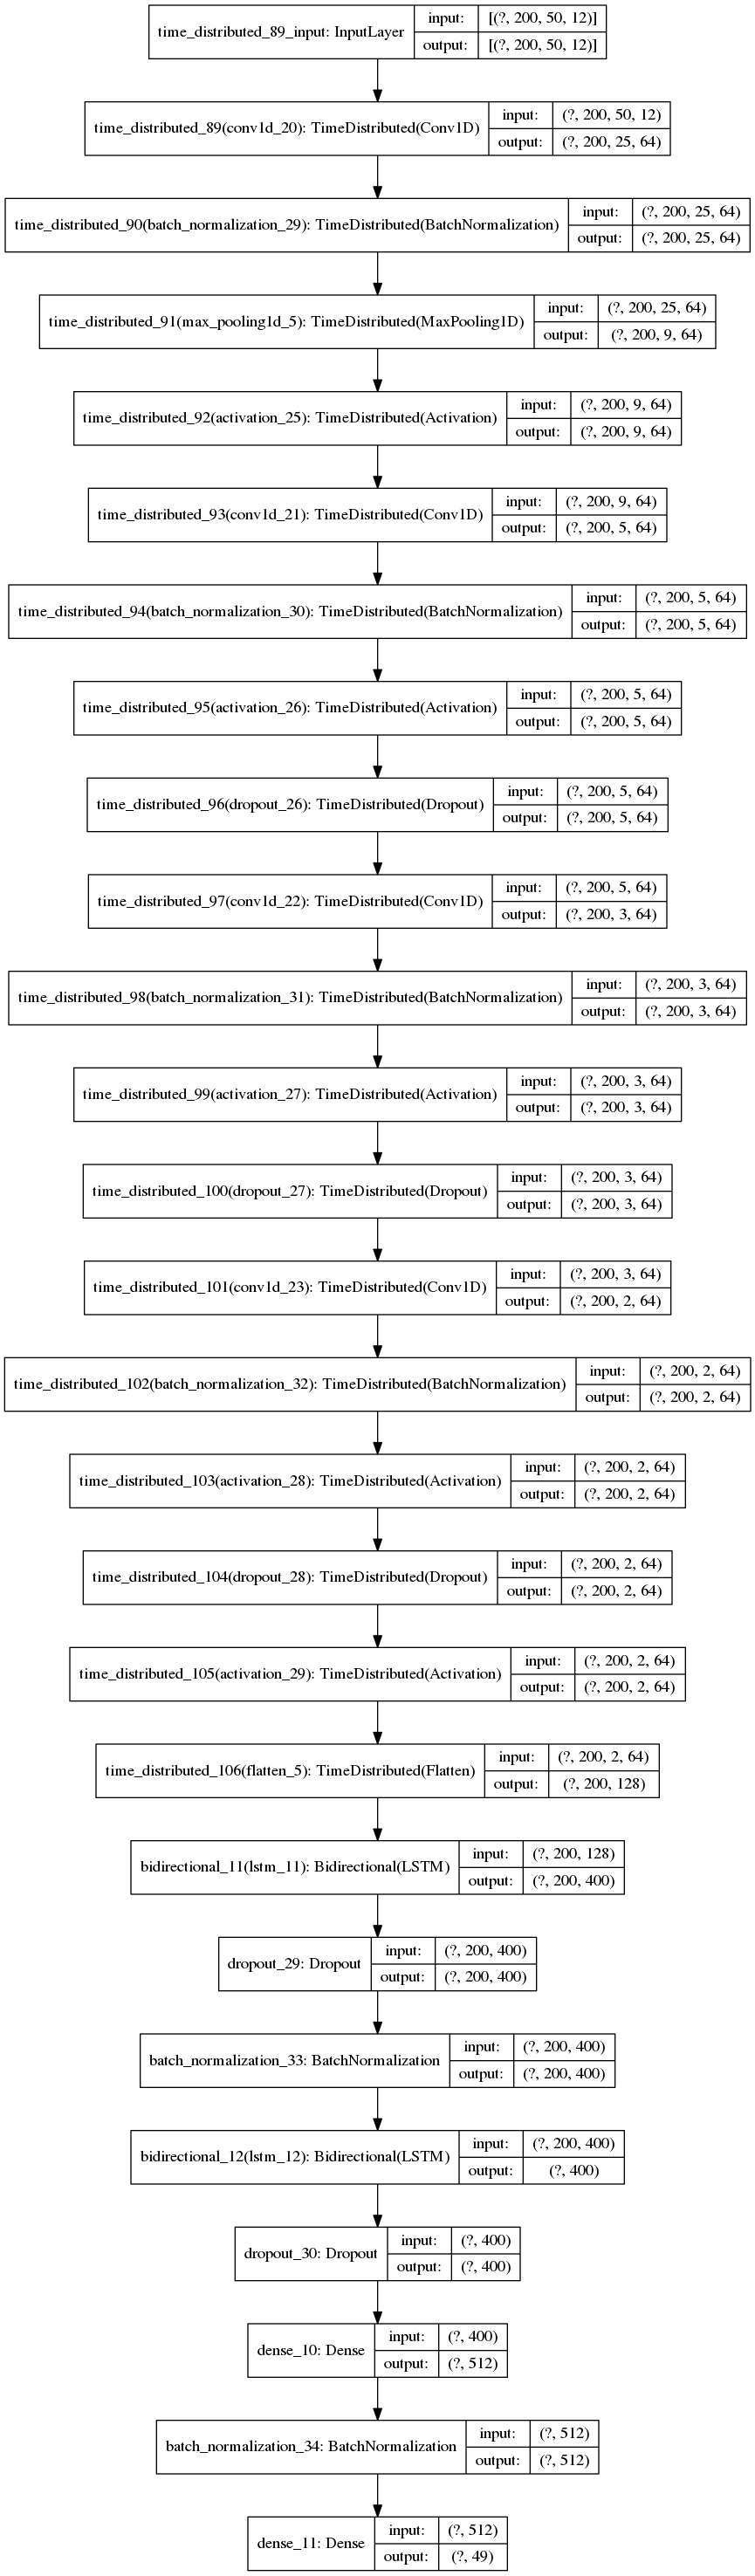

In [99]:
tf.keras.utils.plot_model(model, to_file='/media/naveen/nav/mat_codes/nina_DB2_codes/olsson_DB2/CNN100X100/Model1.png',show_shapes=True,show_layer_names=True,dpi=96)

In [100]:
csv_logger = CSVLogger('/media/naveen/nav/mat_codes/nina_DB2_codes/olsson_DB2/CNN100X100/LSTM_ninaDB4_100X100.csv', append=True, separator=';')
history = model.fit(x_train, y_train_hot, epochs=epochs, batch_size=batch_size, callbacks=[csv_logger,checkpoint_callback,early],validation_data=(x_test, y_test_hot), verbose=1)

Epoch 1/500
490/490 [==============================] - ETA: 0s - loss: 4.4890 - accuracy: 0.0472
Epoch 00001: val_accuracy improved from -inf to 0.09620, saving model to /media/naveen/nav/mat_codes/nina_DB2_codes/preprocess/CNN100X100/checkpoint.hdf5
490/490 [==============================] - 108s 221ms/step - loss: 4.4890 - accuracy: 0.0472 - val_loss: 3.8037 - val_accuracy: 0.0962
Epoch 2/500
490/490 [==============================] - ETA: 0s - loss: 3.8899 - accuracy: 0.0920
Epoch 00002: val_accuracy improved from 0.09620 to 0.14978, saving model to /media/naveen/nav/mat_codes/nina_DB2_codes/preprocess/CNN100X100/checkpoint.hdf5
490/490 [==============================] - 35s 71ms/step - loss: 3.8899 - accuracy: 0.0920 - val_loss: 3.4835 - val_accuracy: 0.1498
Epoch 3/500
490/490 [==============================] - ETA: 0s - loss: 3.5864 - accuracy: 0.1345
Epoch 00003: val_accuracy improved from 0.14978 to 0.18066, saving model to /media/naveen/nav/mat_codes/nina_DB2_codes/preprocess/

Epoch 24/500
490/490 [==============================] - ETA: 0s - loss: 1.3609 - accuracy: 0.6839
Epoch 00024: val_accuracy improved from 0.62388 to 0.63154, saving model to /media/naveen/nav/mat_codes/nina_DB2_codes/preprocess/CNN100X100/checkpoint.hdf5
490/490 [==============================] - 35s 72ms/step - loss: 1.3609 - accuracy: 0.6839 - val_loss: 1.5498 - val_accuracy: 0.6315
Epoch 25/500
490/490 [==============================] - ETA: 0s - loss: 1.3062 - accuracy: 0.6966
Epoch 00025: val_accuracy did not improve from 0.63154
490/490 [==============================] - 35s 71ms/step - loss: 1.3062 - accuracy: 0.6966 - val_loss: 1.6386 - val_accuracy: 0.6076
Epoch 26/500
489/490 [============================>.] - ETA: 0s - loss: 1.2511 - accuracy: 0.7131
Epoch 00026: val_accuracy improved from 0.63154 to 0.63511, saving model to /media/naveen/nav/mat_codes/nina_DB2_codes/preprocess/CNN100X100/checkpoint.hdf5
490/490 [==============================] - 35s 72ms/step - loss: 1.2528

Epoch 50/500
490/490 [==============================] - ETA: 0s - loss: 0.6289 - accuracy: 0.9016
Epoch 00050: val_accuracy improved from 0.74126 to 0.76065, saving model to /media/naveen/nav/mat_codes/nina_DB2_codes/preprocess/CNN100X100/checkpoint.hdf5
490/490 [==============================] - 35s 72ms/step - loss: 0.6289 - accuracy: 0.9016 - val_loss: 1.2561 - val_accuracy: 0.7607
Epoch 51/500
490/490 [==============================] - ETA: 0s - loss: 0.6183 - accuracy: 0.9060
Epoch 00051: val_accuracy did not improve from 0.76065
490/490 [==============================] - 35s 71ms/step - loss: 0.6183 - accuracy: 0.9060 - val_loss: 1.5164 - val_accuracy: 0.6877
Epoch 52/500
490/490 [==============================] - ETA: 0s - loss: 0.6119 - accuracy: 0.9134
Epoch 00052: val_accuracy did not improve from 0.76065
490/490 [==============================] - 35s 71ms/step - loss: 0.6119 - accuracy: 0.9134 - val_loss: 1.3014 - val_accuracy: 0.7471
Epoch 53/500
490/490 [==================

490/490 [==============================] - ETA: 0s - loss: 0.3328 - accuracy: 0.9708
Epoch 00104: val_accuracy did not improve from 0.79561
490/490 [==============================] - 35s 71ms/step - loss: 0.3328 - accuracy: 0.9708 - val_loss: 1.6348 - val_accuracy: 0.7058
Epoch 105/500
490/490 [==============================] - ETA: 0s - loss: 0.3375 - accuracy: 0.9699
Epoch 00105: val_accuracy did not improve from 0.79561
490/490 [==============================] - 35s 72ms/step - loss: 0.3375 - accuracy: 0.9699 - val_loss: 1.6417 - val_accuracy: 0.7063
Epoch 106/500
490/490 [==============================] - ETA: 0s - loss: 0.3255 - accuracy: 0.9740
Epoch 00106: val_accuracy did not improve from 0.79561
490/490 [==============================] - 35s 72ms/step - loss: 0.3255 - accuracy: 0.9740 - val_loss: 1.3158 - val_accuracy: 0.7790
Epoch 107/500
490/490 [==============================] - ETA: 0s - loss: 0.3311 - accuracy: 0.9710
Epoch 00107: val_accuracy did not improve from 0.79561

Epoch 132/500
490/490 [==============================] - ETA: 0s - loss: 0.2708 - accuracy: 0.9790
Epoch 00132: val_accuracy did not improve from 0.81041
490/490 [==============================] - 36s 74ms/step - loss: 0.2708 - accuracy: 0.9790 - val_loss: 1.2478 - val_accuracy: 0.7982
Epoch 133/500
490/490 [==============================] - ETA: 0s - loss: 0.2691 - accuracy: 0.9798
Epoch 00133: val_accuracy did not improve from 0.81041
490/490 [==============================] - 35s 71ms/step - loss: 0.2691 - accuracy: 0.9798 - val_loss: 1.7120 - val_accuracy: 0.7020
Epoch 134/500
490/490 [==============================] - ETA: 0s - loss: 0.2781 - accuracy: 0.9761
Epoch 00134: val_accuracy did not improve from 0.81041
490/490 [==============================] - 35s 71ms/step - loss: 0.2781 - accuracy: 0.9761 - val_loss: 1.4653 - val_accuracy: 0.7578
Epoch 135/500
490/490 [==============================] - ETA: 0s - loss: 0.2688 - accuracy: 0.9784
Epoch 00135: val_accuracy did not improv

Epoch 161/500
490/490 [==============================] - ETA: 0s - loss: 0.2422 - accuracy: 0.9787
Epoch 00161: val_accuracy did not improve from 0.81041
490/490 [==============================] - 35s 72ms/step - loss: 0.2422 - accuracy: 0.9787 - val_loss: 1.3854 - val_accuracy: 0.7818
Epoch 162/500
490/490 [==============================] - ETA: 0s - loss: 0.2332 - accuracy: 0.9798
Epoch 00162: val_accuracy did not improve from 0.81041
490/490 [==============================] - 35s 72ms/step - loss: 0.2332 - accuracy: 0.9798 - val_loss: 1.3776 - val_accuracy: 0.7765
Epoch 163/500
490/490 [==============================] - ETA: 0s - loss: 0.2207 - accuracy: 0.9844
Epoch 00163: val_accuracy did not improve from 0.81041
490/490 [==============================] - 35s 71ms/step - loss: 0.2207 - accuracy: 0.9844 - val_loss: 2.0251 - val_accuracy: 0.6604
Epoch 164/500
490/490 [==============================] - ETA: 0s - loss: 0.2211 - accuracy: 0.9844
Epoch 00164: val_accuracy did not improv

In [101]:
best_index = history.history['val_accuracy'].index(max(history.history['val_accuracy']))
print('epoch_number',best_index+1)
print('train accuracy and validation accuracy', history.history['accuracy'][best_index], history.history['val_accuracy'][best_index]) 

epoch_number 131
train accuracy and validation accuracy 0.9738487005233765 0.8104107975959778


In [102]:
model.save('/media/naveen/nav/mat_codes/nina_DB2_codes/olsson_DB2/CNN100X100/CNN_LSTM_nina_5X97')

INFO:tensorflow:Assets written to: /media/naveen/nav/mat_codes/nina_DB2_codes/preprocess/CNN100X100/CNN_LSTM_nina_5X97/assets


history loss
history accuracy
history val_loss
history val_accuracy


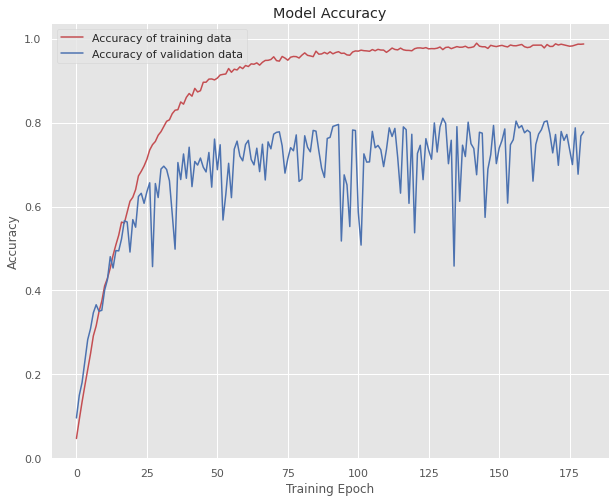

In [103]:
for i in history.history:
    print("history",i)
plt.figure(figsize=(10, 8))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

history loss
history accuracy
history val_loss
history val_accuracy


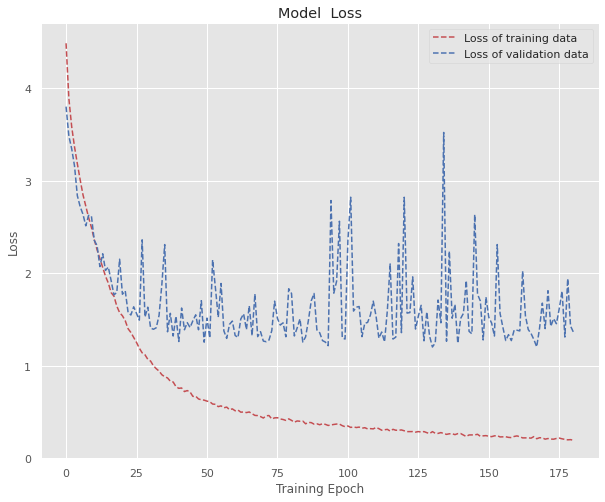

In [104]:
for i in history.history:
    print("history",i)
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model  Loss')
plt.ylabel('Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

In [105]:
model.load_weights(checkpoint_filepath) 
_, testaccuracy = model.evaluate(x_test, y_test_hot, batch_size=batch_size, verbose=1)
print('test_accuracy',testaccuracy)

245/245 [==============================] - 6s 23ms/step - loss: 1.2037 - accuracy: 0.8104
test_accuracy 0.8104107975959778


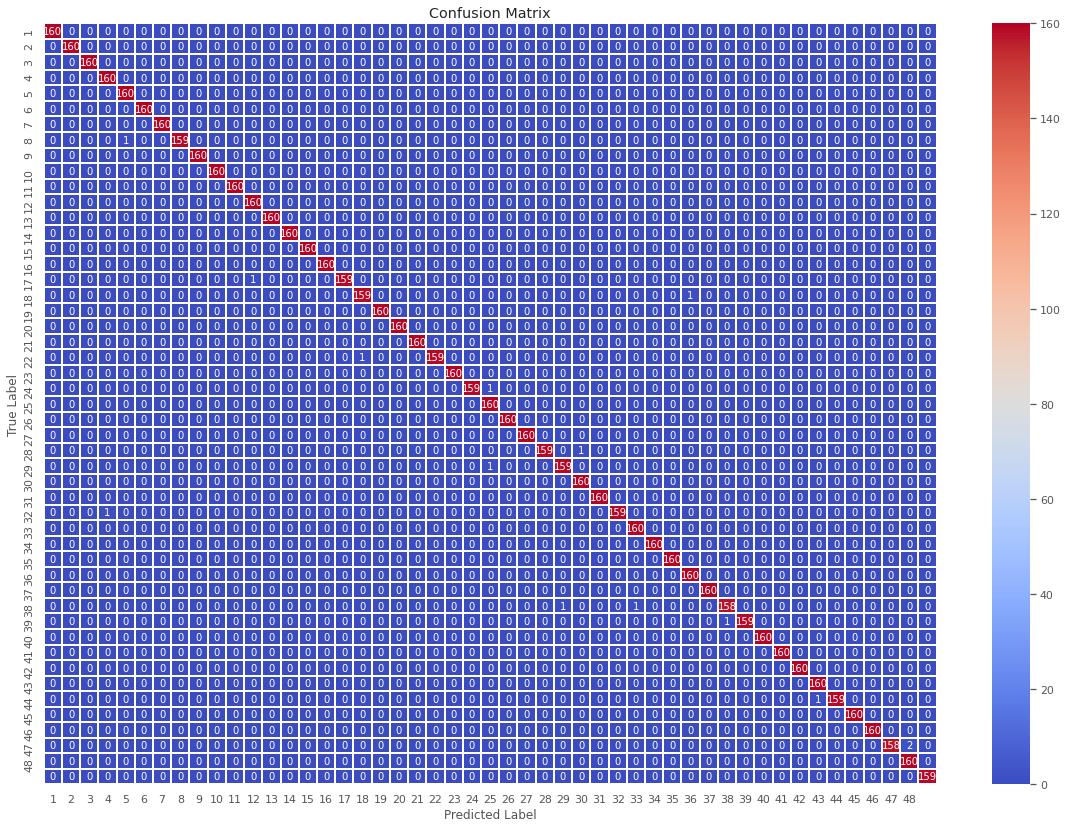

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           1       1.00      1.00      1.00       160
           2       1.00      1.00      1.00       160
           3       0.99      1.00      1.00       160
           4       0.99      1.00      1.00       160
           5       1.00      1.00      1.00       160
           6       1.00      1.00      1.00       160
           7       1.00      0.99      1.00       160
           8       1.00      1.00      1.00       160
           9       1.00      1.00      1.00       160
          10       1.00      1.00      1.00       160
          11       0.99      1.00      1.00       160
          12       1.00      1.00      1.00       160
          13       1.00      1.00      1.00       160
          14       1.00      1.00      1.00       160
          15       1.00      1.00      1.00       160
          16       1.00      0.99      1.00       160
          17       0.99    

In [106]:
y_pred_train = model.predict(x_train)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
#max_y_train = np.argmax(y_train, axis=1)
show_confusion_matrix(y_train, max_y_pred_train)
print(classification_report(y_train, max_y_pred_train))

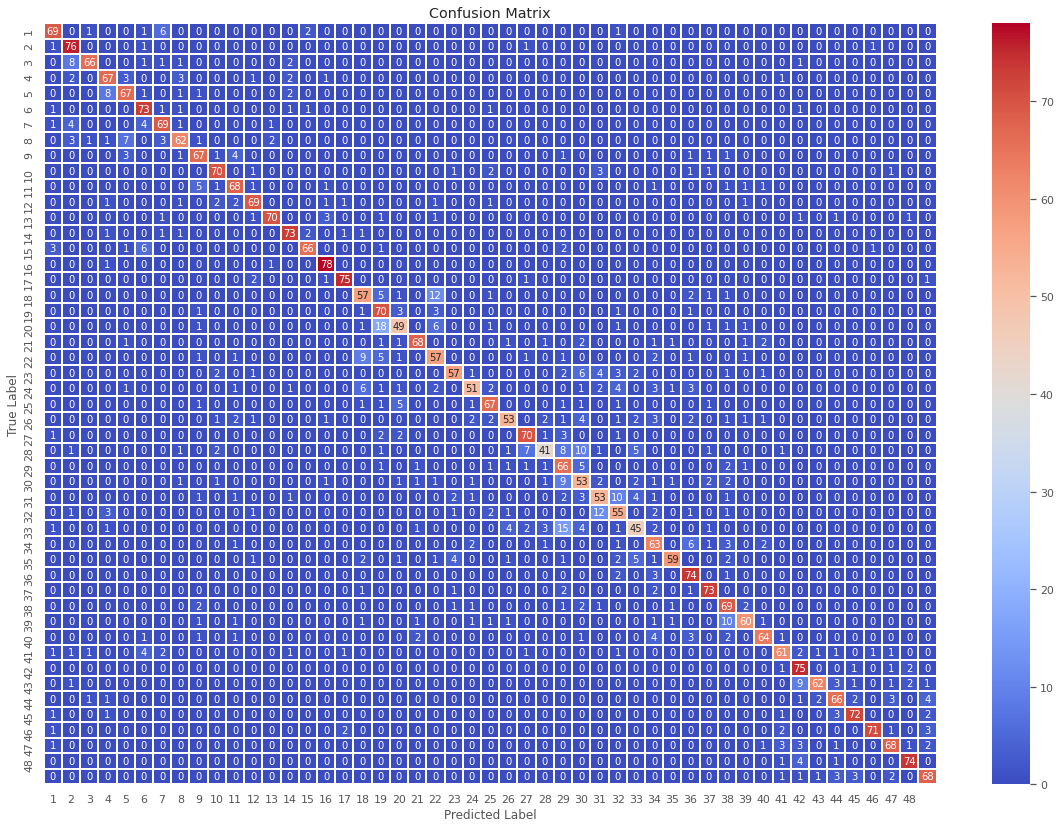

              precision    recall  f1-score   support

           0       0.85      0.86      0.86        80
           1       0.78      0.95      0.86        80
           2       0.94      0.82      0.88        80
           3       0.79      0.84      0.81        80
           4       0.81      0.84      0.82        80
           5       0.79      0.91      0.85        80
           6       0.82      0.86      0.84        80
           7       0.84      0.78      0.81        80
           8       0.81      0.84      0.82        80
           9       0.88      0.88      0.88        80
          10       0.83      0.85      0.84        80
          11       0.87      0.86      0.87        80
          12       0.95      0.88      0.91        80
          13       0.88      0.91      0.90        80
          14       0.93      0.82      0.87        80
          15       0.90      0.97      0.93        80
          16       0.94      0.94      0.94        80
          17       0.71    

In [107]:
y_pred_test = model.predict(x_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test_hot, axis=1)
show_confusion_matrix(max_y_test, max_y_pred_test)
print(classification_report(max_y_test, max_y_pred_test))

In [108]:
# model = Sequential()
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=9, padding='same', kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04)), \
#                            input_shape=(n_steps,n_length,n_depth)))
# model.add(TimeDistributed(MaxPooling1D(pool_size=8,strides=2)))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Activation('relu')))
# model.add(TimeDistributed(Flatten()))
# # model.add(Bidirectional(LSTM(200,return_sequences=True)))
# # model.add(Dropout(0.5))
# # model.add(Bidirectional(LSTM(200,return_sequences=True)))
# # model.add(Dropout(0.5))
# # model.add(BatchNormalization(epsilon=1e-05, momentum=0.9, weights=None))
# model.add(Bidirectional(LSTM(200)))
# model.add(Dropout(0.5))
# model.add(Dense(512, activation='tanh'))
# model.add(BatchNormalization(epsilon=1e-05, momentum=0.9, weights=None))
# model.add(Dense(n_outputs, activation='softmax'))